<a href="https://colab.research.google.com/github/arnav39/d2el-en/blob/main/5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.2 Implementation of Multilayer perceptrons

In [ ]:
!pip install matplotlib_inline
!pip install --upgrade d2l==1.0.0a0

In [2]:
import torch
import torch.nn as nn
from d2l import torch as d2l

In [3]:
import torchvision

In [6]:
a = nn.Parameter(torch.randn(3, 1))
print(a)

Parameter containing:
tensor([[ 1.0409e-01],
        [-1.7994e+00],
        [-6.1802e-04]], requires_grad=True)


In [4]:
nn.Parameter??

In [13]:
a = torch.randn(100, 1, 28, 28)
print(a.shape)

torch.Size([100, 1, 28, 28])


In [14]:
a = a.reshape(-1, 784)
print(a.shape)

torch.Size([100, 784])


In [12]:
a = a.reshape(100, -1)
a.shape

torch.Size([100, 784])

In [4]:
class MLPScratch(d2l.Classifier):
  
  def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
    self.b1 = nn.Parameter(torch.zeros(num_hiddens))
    self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
    self.b2 = nn.Parameter(torch.zeros(num_outputs))

  def forward(self, X):
    X = X.reshape(X.shape[0], -1)
    out = relu(torch.mm(X, self.W1) + self.b1)
    out = torch.mm(out, self.W2) + self.b2
    return out

In [8]:
b = torch.randn(4, 4)
print(b)
a = torch.zeros_like(b)
print(torch.max(a, b))

tensor([[-0.1583,  0.5632,  0.4435, -1.1850],
        [ 0.7719, -0.2190, -1.1370,  1.5180],
        [-0.0370,  0.8013, -0.9884,  0.0960],
        [ 1.4302, -0.3622, -0.3721,  1.8424]])
tensor([[0.0000, 0.5632, 0.4435, 0.0000],
        [0.7719, 0.0000, 0.0000, 1.5180],
        [0.0000, 0.8013, 0.0000, 0.0960],
        [1.4302, 0.0000, 0.0000, 1.8424]])


In [5]:
def relu(X):
  a = torch.zeros_like(X)
  return torch.max(X, a)

In [16]:
d2l.FashionMNIST??

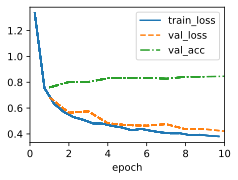

In [19]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

concise implementation

In [20]:
nn.Sequential??

In [24]:
nn.Flatten??

In [25]:
nn.ReLU??

In [26]:
nn.CrossEntropyLoss??

In [6]:
class MLP(nn.Module):

  def __init__(self, num_outputs, num_hiddens, lr):
    super().__init__()
    self.num_outputs = num_outputs
    self.num_hiddens = num_hiddens
    self.lr = lr
    self.net = nn.Sequential(nn.Flatten(),
                             nn.LazyLinear(num_hiddens),
                             nn.ReLU(),
                             nn.LazyLinear(num_outputs))
    
  def forward(self, X):
    return self.net(X)

In [30]:
torchvision.datasets.FashionMNIST??

In [7]:
import torchvision
import torchvision.transforms as transforms

In [32]:
transforms.ToTensor??

In [8]:
# Hyper_parameters
batch_size = 256
num_outputs = 10
num_hiddens = 256
num_epochs = 10

In [ ]:
a = torchvision.datasets.FashionMNIST(root='./trial',
                                      train=True,
                                      download=True)

In [44]:
a

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./trial
    Split: Train

In [46]:
a.data.shape

torch.Size([60000, 28, 28])

In [9]:
# STEP 0 : PREPARE THE DATASET

# FashionMNIST

train_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                                  train=True,
                                                  download=True,
                                                  transform=transforms.ToTensor())


test_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                                 train=False,
                                                 download=False,
                                                 transform=transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [39]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [35]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [36]:
train_dataset.targets.shape

torch.Size([60000])

In [40]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [41]:
test_dataset.targets.shape

torch.Size([10000])

In [42]:
train_dataset.targets[0:5]

tensor([9, 0, 0, 3, 0])

In [10]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               shuffle=True,
                                               batch_size=batch_size,
                                               num_workers=4)

test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              shuffle=False,
                                              batch_size=batch_size,
                                              num_workers=4)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [49]:
len(train_dataloader) # so we have 235 batches

235

In [50]:
len(test_dataloader) 

40

In [52]:
examples = next(iter(train_dataloader))
features, targets = examples
print(features.shape, targets.shape)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([256, 1, 28, 28]) torch.Size([256])


In [11]:
import matplotlib.pyplot as plt

In [58]:
plt.subplot??

In [60]:
plt.imshow??

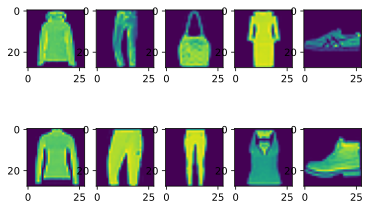

In [59]:
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(features[i][0])

plt.show()

In [16]:
model = MLP(num_outputs, num_hiddens, lr=0.1)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [17]:
# optimizer and loss functon
optimizer = torch.optim.SGD(model.parameters(), model.lr)
criterion = nn.CrossEntropyLoss()

In [69]:
len(train_dataloader)

235

In [78]:
# Training_loop : 

n_total_steps = len(train_dataloader)

for epoch in range(num_epochs):

  for i, (images, labels) in enumerate(train_dataloader):

    # fwd pass : y_hat and loss
    y_hat = model.forward(images)
    loss = criterion(y_hat, labels)

    # backward pass : gradient
    loss.backward()

    # update the params
    optimizer.step()

    # zero the grad
    optimizer.zero_grad()

    if (i+1) % 100 == 0:
      print(f"epoch : {epoch+1}/{num_epochs}, step : {i+1}/{n_total_steps}, loss = {loss.item():.4f}")

epoch : 1/10, step : 100/235, loss = 0.7442
epoch : 1/10, step : 200/235, loss = 0.6585
epoch : 2/10, step : 100/235, loss = 0.5146
epoch : 2/10, step : 200/235, loss = 0.4707
epoch : 3/10, step : 100/235, loss = 0.4265
epoch : 3/10, step : 200/235, loss = 0.4632
epoch : 4/10, step : 100/235, loss = 0.4136
epoch : 4/10, step : 200/235, loss = 0.4820
epoch : 5/10, step : 100/235, loss = 0.4259
epoch : 5/10, step : 200/235, loss = 0.4013
epoch : 6/10, step : 100/235, loss = 0.4779
epoch : 6/10, step : 200/235, loss = 0.4560
epoch : 7/10, step : 100/235, loss = 0.3442
epoch : 7/10, step : 200/235, loss = 0.4550
epoch : 8/10, step : 100/235, loss = 0.3318
epoch : 8/10, step : 200/235, loss = 0.4220
epoch : 9/10, step : 100/235, loss = 0.3115
epoch : 9/10, step : 200/235, loss = 0.3899
epoch : 10/10, step : 100/235, loss = 0.4720
epoch : 10/10, step : 200/235, loss = 0.4119


now let's evaluate the model

In [80]:
a = torch.arange(12).reshape(3, 4)
b, c = torch.max(a, 1)
print(a)
print(b)
print(c)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([ 3,  7, 11])
tensor([3, 3, 3])


In [83]:
with torch.no_grad():
  X, y = next(iter(test_dataloader))
  print(f"X.shape = {X.shape}, y.shape = {y.shape}")
  y_1 = model.forward(X)
  print(f"y_1.shape = {y_1.shape}")
  y_2 = model(X)
  print(f"y_2.shape = {y_2.shape}")

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


X.shape = torch.Size([256, 1, 28, 28]), y.shape = torch.Size([256])
y_1.shape = torch.Size([256, 10])
y_2.shape = torch.Size([256, 10])


In [86]:
_, preds = torch.max(y_1, 1)
preds.shape

torch.Size([256])

In [88]:
(preds == y).sum() / preds.numel()

tensor(0.8789)

In [85]:
(y_1 == y_2).sum() / y_1.numel()

tensor(1.)

In [89]:
with torch.no_grad():

  n_samples = 0
  n_correct = 0

  for features, labels in test_dataloader:

    outputs = model.forward(features)
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100 * (n_correct / n_samples)
  print(f'accuracy = {acc:.4f}')

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


accuracy = 84.9100


## Ex 5.2

### Q1: 

optimum value is 512 or 128

In [91]:
# hyperparameters

learning_rate = 0.1
max_epochs = 10
num_outputs = 10

In [92]:
def give_accuracy(num_hiddens):

  '''
  functions gives the accuracy of the model corresponding to the given number of hidden units
  '''

  model = MLP(num_outputs, num_hiddens, lr = learning_rate)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), model.lr)

  # training loop
  for epoch in range(max_epochs):

    for features, targets in train_dataloader:

      # fwd pass : y_hat and the loss
      outputs = model(features)
      loss = criterion(outputs, targets)

      # backward pass : gradient
      loss.backward()

      # update the params
      optimizer.step()

      # zero the grad
      optimizer.zero_grad()

    # loss calculate the accuracy

  with torch.no_grad():
    n_samples = 0
    n_correct = 0
    for features, targets in test_dataloader:
      outputs = model(features)
      _, preds = torch.max(outputs, 1)
      n_samples += targets.shape[0]
      n_correct += (preds == targets).sum().item()

    acc = 100 * (n_correct / n_samples)
    return acc

In [93]:
num_hiddens_list = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
acc_list = []

for i, num_hiddens in enumerate(num_hiddens_list):
  t = give_accuracy(num_hiddens)
  print(f"i = {i+1}, acc = {t}")
  acc_list.append(t)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


i = 1, acc = 60.919999999999995
i = 2, acc = 78.3
i = 3, acc = 80.25999999999999
i = 4, acc = 83.11
i = 5, acc = 83.47
i = 6, acc = 83.25
i = 7, acc = 85.11
i = 8, acc = 83.47
i = 9, acc = 85.18
i = 10, acc = 81.54


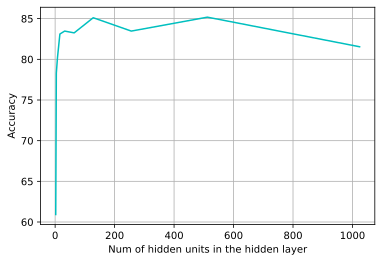

In [96]:
plt.plot(num_hiddens_list, acc_list, 'c')
plt.xlabel("Num of hidden units in the hidden layer")
plt.ylabel("Accuracy")
plt.grid();

### Q2:

accuracy imporved a bit

In [12]:
class MLP2(nn.Module):

  def __init__(self, num_outputs, num_hiddens1, num_hiddens2, lr):
    super().__init__()
    self.lr = lr
    self.net = nn.Sequential(nn.Flatten(),
                             nn.LazyLinear(num_hiddens1),
                             nn.ReLU(),
                             nn.LazyLinear(num_hiddens2),
                             nn.LeakyReLU(),
                             nn.LazyLinear(num_outputs))
    
  def forward(self, X):
    return self.net(X)

In [105]:
# hyperparameters
num_outputs = 10
num_hiddens1 = 128
num_hiddens2 = 512
learning_rate = 0.1
max_epochs = 10
batch_size = 256

In [99]:
model = MLP2(num_outputs, num_hiddens1, num_hiddens2, lr=learning_rate)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [100]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), model.lr)

In [106]:
len(train_dataloader)

235

In [107]:
# training_loop

for epoch in range(max_epochs):

  for i, (features, targets) in enumerate(train_dataloader):

    # fwd pass: 
    outputs = model(features)
    loss = criterion(outputs, targets)

    # backward pass :
    loss.backward()

    # update the params
    optimizer.step()

    # zero the grad:
    optimizer.zero_grad()

    if (i+1)%100 == 0:
      print(f"epoch : {epoch+1}/{max_epochs}, step : {i+1}/{len(train_dataloader)}, loss = {loss.item():.4f}")

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


epoch : 1/10, step : 100/235, loss = 0.7600
epoch : 1/10, step : 200/235, loss = 0.6124
epoch : 2/10, step : 100/235, loss = 0.6226
epoch : 2/10, step : 200/235, loss = 0.4901
epoch : 3/10, step : 100/235, loss = 0.4247
epoch : 3/10, step : 200/235, loss = 0.5300
epoch : 4/10, step : 100/235, loss = 0.4728
epoch : 4/10, step : 200/235, loss = 0.4242
epoch : 5/10, step : 100/235, loss = 0.3762
epoch : 5/10, step : 200/235, loss = 0.3890
epoch : 6/10, step : 100/235, loss = 0.4186
epoch : 6/10, step : 200/235, loss = 0.4412
epoch : 7/10, step : 100/235, loss = 0.3689
epoch : 7/10, step : 200/235, loss = 0.3496
epoch : 8/10, step : 100/235, loss = 0.3409
epoch : 8/10, step : 200/235, loss = 0.3910
epoch : 9/10, step : 100/235, loss = 0.4869
epoch : 9/10, step : 200/235, loss = 0.3363
epoch : 10/10, step : 100/235, loss = 0.4531
epoch : 10/10, step : 200/235, loss = 0.3828


In [108]:
# evalutation
with torch.no_grad():
  n_samples = 0.
  n_correct = 0.

  for features, targets in test_dataloader:
    outputs = model(features)
    _, preds = torch.max(outputs, 1)
    n_samples += targets.shape[0]
    n_correct += (preds == targets).sum().item()

  acc = 100 * (n_correct / n_samples)
  print(f"accuracy = {acc:.4f}%")

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


accuracy = 86.2100


### Q3: 

let's see

In [109]:
model = MLP(10, 1, 0.1)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), model.lr)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [110]:
max_epochs = 10

for epoch in range(max_epochs):

  for i, (features, targets) in enumerate(train_dataloader):

    # forward pass : 
    outputs = model(features)
    loss = criterion(outputs, targets)

    # backward pass :
    loss.backward()

    # update the params
    optimizer.step()

    # zero the grad
    optimizer.zero_grad()

    if (i+1)%100 == 0:
      print(f"epoch : {epoch+1}/{max_epochs}, step : {i+1}/{len(train_dataloader)}, loss = {loss.item():.4f}")

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


epoch : 1/10, step : 100/235, loss = 2.3318
epoch : 1/10, step : 200/235, loss = 2.3069
epoch : 2/10, step : 100/235, loss = 2.3031
epoch : 2/10, step : 200/235, loss = 2.3032
epoch : 3/10, step : 100/235, loss = 2.3022
epoch : 3/10, step : 200/235, loss = 2.3032
epoch : 4/10, step : 100/235, loss = 2.3023
epoch : 4/10, step : 200/235, loss = 2.3027
epoch : 5/10, step : 100/235, loss = 2.3029
epoch : 5/10, step : 200/235, loss = 2.3031
epoch : 6/10, step : 100/235, loss = 2.3028
epoch : 6/10, step : 200/235, loss = 2.3022
epoch : 7/10, step : 100/235, loss = 2.3016
epoch : 7/10, step : 200/235, loss = 2.3030
epoch : 8/10, step : 100/235, loss = 2.3029
epoch : 8/10, step : 200/235, loss = 2.3032
epoch : 9/10, step : 100/235, loss = 2.3023
epoch : 9/10, step : 200/235, loss = 2.3031
epoch : 10/10, step : 100/235, loss = 2.3027
epoch : 10/10, step : 200/235, loss = 2.3018


In [111]:
# evalutation
with torch.no_grad():
  n_samples = 0.
  n_correct = 0.

  for features, targets in test_dataloader:
    outputs = model(features)
    _, preds = torch.max(outputs, 1)
    n_samples += targets.shape[0]
    n_correct += (preds == targets).sum().item()

  acc = 100 * (n_correct / n_samples)
  print(f"accuracy = {acc:.4f}%")

accuracy = 10.0000%


accuracy went down alot

### Q4:

best learning_rate = 0.4

In [20]:
num_outputs=10
num_hiddens=256
max_epochs = 10

In [26]:
def give_acc(lr):

  model = MLP(num_outputs, num_hiddens, lr)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), model.lr)

  # Training loop
  for epoch in range(max_epochs):

    for i, (features, targets) in enumerate(train_dataloader):

      # forward pass :
      outputs = model(features)
      loss = criterion(outputs, targets)

      # backward pass :
      loss.backward()

      # update the params :
      optimizer.step()

      # zero the grad :  
      optimizer.zero_grad()

    # now evaluation
  with torch.no_grad():
    n_samples = 0.0
    n_correct = 0.0
    for features, targets in test_dataloader:
      outputs = model(features)
      _, preds = torch.max(outputs, 1)
      n_samples += targets.shape[0]
      n_correct += (preds == targets).sum().item()

    acc = 100 * (n_correct / n_samples)
    return acc

In [27]:
lr_list = [0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

acc_list = list(map(give_acc, lr_list))

In [29]:
acc_list

[80.07,
 82.95,
 82.78999999999999,
 84.82,
 85.08,
 85.48,
 82.16,
 81.22,
 87.21,
 86.48,
 84.54]

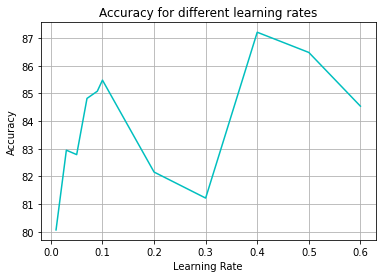

In [30]:
plt.plot(lr_list, acc_list, 'c')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Accuracy for different learning rates")
plt.grid();

In [13]:
class Trainer():

  def __init__(self, max_epochs):
    self.max_epochs = max_epochs

  def fit(self, model, data_loader, print=False):

    # loss and optimizer
    optimizer = torch.optim.SGD(model.parameters(), model.lr)
    criterion = nn.CrossEntropyLoss()

    # training loop:
    for epoch in range(self.max_epochs):

      for i, (features, targets) in enumerate(data_loader):

        # forward pass:
        outputs = model(features)
        loss = criterion(outputs, targets)

        # backward pass:
        loss.backward()

        # update the params
        optimizer.step()

        # zero the grad
        optimizer.zero_grad()

        if print:
          if (i+1)%100 == 0 and (epoch+1)%(self.max_epochs/10) == 0:
            print(f"epoch : {epoch+1}/{self.max_epochs}, step : {i+1}/{len(data_loader)}, loss = {loss.item():.4f}")

In [27]:
def give_acc(model, test_dataloader):
  with torch.no_grad():
    n_samples = 0.0
    n_correct = 0.0
    for features, targets in test_dataloader:
      outputs = model(features)
      _, preds = torch.max(outputs, 1)
      n_samples += targets.shape[0]
      n_correct += (preds == targets).sum().item()

    acc = 100 * (n_correct / n_samples)
    return acc

In [34]:
epoch_list = [10, 20, 40, 80, 120, 160, 200] 
acc_list = []

for i, epochs in enumerate(epoch_list):
  model = MLP(num_outputs, num_hiddens, lr=0.4)
  trainer = Trainer(epochs)
  trainer.fit(model, train_dataloader)
  t = give_acc(model, test_dataloader)
  print(f"i = {i+1}/{len(epoch_list)}, acc of model = {t:.4f}")
  acc_list.append(t)

i = 1/7, acc of model = 86.1700
i = 2/7, acc of model = 85.8800
i = 3/7, acc of model = 88.3200
i = 4/7, acc of model = 83.8400
i = 5/7, acc of model = 88.8100
i = 6/7, acc of model = 87.8900
i = 7/7, acc of model = 85.4000


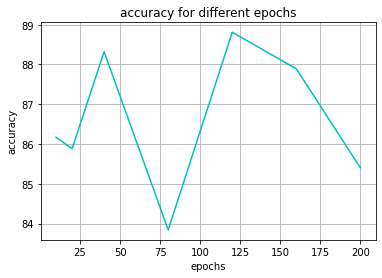

In [36]:
plt.plot(epoch_list, acc_list, 'c')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy for different epochs")
plt.grid();

### Q5:

optimum value of hyperparameters:

learning_rate = 0.4

hidden_units in layer = 512 or 128

batch_size = 256

max_epochs = 120

In [37]:
# Hyperparameters

num_outputs = 10
num_hiddens = 512
batch_size = 256
learning_rate = 0.4
batch_size = 256
max_epochs = 120

In [40]:
model = MLP(num_outputs, num_hiddens, lr=learning_rate)
trainer = Trainer(max_epochs)
trainer.fit(model, train_dataloader)
acc = give_acc(model, test_dataloader)
print(f"accuracy = {acc:.4f}")

accuracy = 89.6100


### Q7:

In [13]:
import time
import torch
import torch.nn as nn

In [6]:
dim = 2000
mat = torch.randn(dim, dim)
tic = time.time()
pdt = torch.mm(mat, mat)
print(f"time taken using CPU = {time.time() - tic:.4f} sec")

time taken using CPU = 0.1307 sec


In [7]:
dim = 2000
mat = torch.randn(dim, dim).cuda()
tic = time.time()
pdt = torch.mm(mat, mat)
print(f"time taken using GPU = {time.time() - tic:.4f} sec")

time taken using GPU = 0.0006 sec


### Q8:

ReLU function is most widely used activation function in hidden layers

### Q9:

initialization plays an important role

when weights are initialized to zero then the model is not able to learn anything : acc = 10%

normal(0, 0.001) : acc = 83.6%

normal(0, 0.01) : acc = 75.3%

normal(0, 1) : acc = 74.79%

normal(0, 100) : acc = 23.21%

In [8]:
torch.relu

<function torch._VariableFunctionsClass.relu>

In [16]:
a = torch.randn(100, 1, 28, 28)
a = a.reshape(100, -1)
print(a.shape)

torch.Size([100, 784])


In [32]:
class MLP_zero():

  def __init__(self, num_inputs, num_outputs, num_hiddens, lr):
    self.lr = lr
    self.W1 = torch.normal(0, 0.001, (num_inputs, num_hiddens), requires_grad=True)
    self.b1 = torch.zeros(1, num_hiddens, requires_grad=True)
    self.W2 = torch.normal(0, 0.001, (num_hiddens, num_outputs), requires_grad=True)
    self.b2 = torch.zeros(1, num_outputs, requires_grad=True)

  def forward(self, X):
    X = X.reshape(X.shape[0], -1)
    out = torch.relu(torch.mm(X, self.W1) + self.b1)
    out = torch.mm(out, self.W2) + self.b2
    return out

In [15]:
num_inputs = 784
num_outputs = 10
num_hiddens = 100
lr = 0.3
max_epochs = 10

In [33]:
model = MLP_zero(num_inputs, num_outputs, num_hiddens, lr)

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD([model.W1, model.b1, model.W2, model.b2], model.lr)

In [35]:
# training_loop
for epoch in range(max_epochs):

  for i, (features, labels) in enumerate(train_dataloader):
  
    outputs = model.forward(features)
    loss = criterion(outputs, labels) # will use fashion mnist dataset 
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (i+1)%100 == 0:
      print(f"epoch : {epoch+1}/{max_epochs}, step : {i+1}/{len(train_dataloader)},loss = {loss.item():.4f}")

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


epoch : 1/10, step : 100/235,loss = 0.8069
epoch : 1/10, step : 200/235,loss = 0.6098
epoch : 2/10, step : 100/235,loss = 0.5997
epoch : 2/10, step : 200/235,loss = 0.4263
epoch : 3/10, step : 100/235,loss = 0.3761
epoch : 3/10, step : 200/235,loss = 0.4250
epoch : 4/10, step : 100/235,loss = 0.4307
epoch : 4/10, step : 200/235,loss = 0.3672
epoch : 5/10, step : 100/235,loss = 0.3720
epoch : 5/10, step : 200/235,loss = 0.5066
epoch : 6/10, step : 100/235,loss = 0.3565
epoch : 6/10, step : 200/235,loss = 0.4053
epoch : 7/10, step : 100/235,loss = 0.3448
epoch : 7/10, step : 200/235,loss = 0.3557
epoch : 8/10, step : 100/235,loss = 0.4185
epoch : 8/10, step : 200/235,loss = 0.2942
epoch : 9/10, step : 100/235,loss = 0.4071
epoch : 9/10, step : 200/235,loss = 0.3106
epoch : 10/10, step : 100/235,loss = 0.2980
epoch : 10/10, step : 200/235,loss = 0.2990


In [36]:
with torch.no_grad():
  n_samples = 0.0
  n_correct = 0.
  for features, targets in test_dataloader:
    outputs = model.forward(features)
    _, preds = torch.max(outputs, 1)
    n_samples += targets.shape[0]
    n_correct += (preds == targets).sum().item()

  acc = 100 * (n_correct / n_samples)
  print(f"accuracy = {acc:.4f}")

accuracy = 83.6600
